In [1]:
!pip install JasonUtils codetiming

     |████████████████████████████████| 1.3 MB 5.7 MB/s 
     |████████████████████████████████| 2.0 MB 43.2 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065928 sha256=32b8055d05df5e16d72bc81b99836a7691d9715c43a31184de5151a2e5cbfe8f
  Stored in directory: /root/.cache/pip/wheels/9a/d6/39/e26b6f988cc5acd1fba2c1b18f0debe27bdee3e1e53f4c93f9
Successfully built simpleaudio


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from JasonUtils.Results import results
from sklearn.metrics import precision_score, recall_score
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_X_y
import seaborn as sn
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [3]:
def predict_values(y):
    pre=[]
    for i in range(len(y)):
        if y[i]==0:
            pre.append('setosa')
        elif y[i]==1:
            pre.append('versicolor')
        elif y[i]==2:
            pre.append('virginica')
    return pre

In [4]:
def plotDecisionBoundary(X, y, est, title=''):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)

In [5]:
def plot_accuracy(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("predict Values:\n ",y_pred)
    #Making the Confusion Matrix and Classification Report
    print("\nAccuracy for model in training data: ",model.score(x_train,y_train)*100)
    print("Accuracy for model in testing data: ",model.score(x_test,y_test)*100)
    print('\nClassification Report:\n')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:\n')
    hm=sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    plt.show()

In [6]:
# Load Iris Dataset 
iris = datasets.load_iris()
X, y = iris.data, iris.target
trX, teX, trY, teY = train_test_split(X, y, random_state=0)

predict Values:
  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]

Accuracy for model in training data:  94.64285714285714
Accuracy for model in testing data:  100.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:



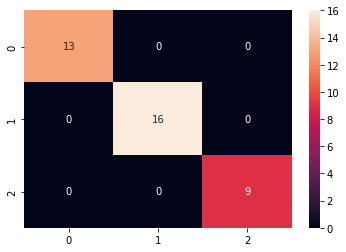

In [7]:
#Apply Naïve Bayes Classifier to get training and testing accuracy (before droping the petal length and petal width)
clf_nai_b=GaussianNB()
plot_accuracy(clf_nai_b, trX, teX, trY, teY)

In [8]:
# Drop the petal length and petal width features to form a 2D Iris dataset
x=X[:,0:2]

In [9]:
#train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
y_train_names = predict_values(y_train)
y_test_names = predict_values(y_test)

predict Values:
  [1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0]

Accuracy for model in training data:  82.5
Accuracy for model in testing data:  73.33333333333333

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.69      0.69      0.69        13
           2       0.33      0.33      0.33         6

    accuracy                           0.73        30
   macro avg       0.68      0.68      0.68        30
weighted avg       0.73      0.73      0.73        30

Confusion Matrix:



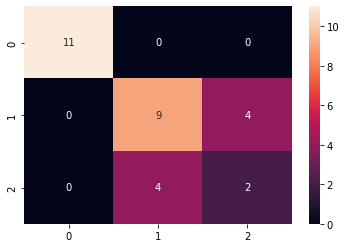

In [11]:
#Apply Naïve Bayes Classifier to get training and testing accuracy (after droping the petal length and petal width)
clf_nai_drop=GaussianNB()
plot_accuracy(clf_nai_drop, x_train, x_test, y_train, y_test)

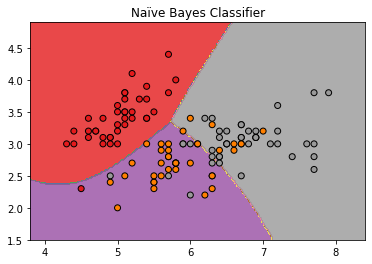

In [12]:
plotDecisionBoundary(x_train, y_train, clf_nai_drop, 'Naïve Bayes Classifier')

In [26]:
def plot_accVSvarsmooth(var_smoothing, accuracy):
    var = range(len(var_smoothing))
    plt.plot(var, accuracy)
    plt.xticks(var, var_smoothing)
    plt.title('Effect of var_smothing on Accuracy ')
    plt.ylabel('Accuracy')
    plt.xlabel('tune var_smothing')

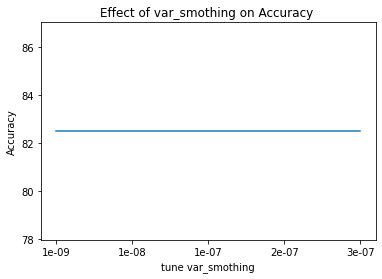

In [27]:
# Tune hyperparameters of Naive Bayes Classifier (i.e., var_smoothing)
acc_train=[]
acc_test=[]
var_smoothing=[1e-9, 1e-8, 1e-7,2e-7,3e-7]
for i in range(len(var_smoothing)):
    clf_nai_tune=GaussianNB(var_smoothing=var_smoothing[i])
    clf_nai_tune.fit(x_train, y_train)
    y_pred=clf_nai_tune.predict(x_test)
    acc_train.append(clf_nai_tune.score(x_train, y_train)*100)
    acc_test.append(clf_nai_tune.score(x_test, y_test)*100)
#Plot accuracy vs var_smoothing curve for training set
plot_accVSvarsmooth(var_smoothing, acc_train)

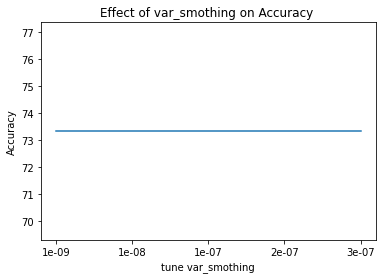

In [28]:
#Plot accuracy vs var_smoothing curve for testing set
plot_accVSvarsmooth(var_smoothing, acc_test)

In [16]:
class BayesianDecisionTheoryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator, utilityMat):
        self.estimator = estimator
        self.utilityMat = utilityMat

    def fit(self, X, y):
        check_X_y(X,y)
        self.classes_ = np.unique(y)
        self.estimator_ = clone(self.estimator).fit(X, y)
        return self

    def predict_proba(self, X):
        check_is_fitted(self)
        prob = self.estimator_.predict_proba(X)
        probList = [(prob * self.utilityMat[index]).sum(axis=1).reshape((-1, 1))
                    for index, c in enumerate(self.classes_)]
        prob = np.hstack(probList)
        return prob

    def predict(self, X):
        pred = self.predict_proba(X).argmin(axis=1)
        return self.classes_[pred]

In [17]:
utilityMat = np.array([
    [-10, -5, -5],
    [-5, -10, -5],
    [-5, -5, -100],
])

In [18]:
bdtc = BayesianDecisionTheoryClassifier(clf_nai_drop, utilityMat)

predict Values:
  [2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 2 1 0]

Accuracy for model in training data:  65.83333333333333
Accuracy for model in testing data:  60.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.08      0.14        13
           2       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.78      0.69      0.55        30
weighted avg       0.87      0.60      0.53        30

Confusion Matrix:



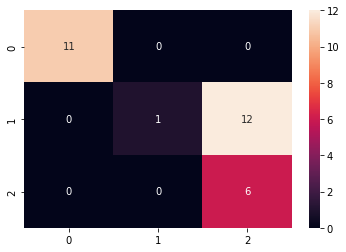

In [19]:
plot_accuracy(bdtc, x_train, x_test, y_train, y_test)

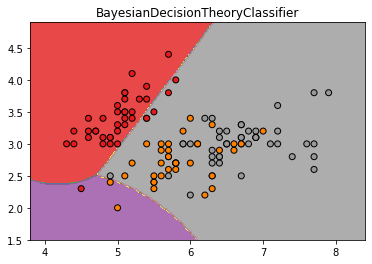

In [20]:
plotDecisionBoundary(x_train, y_train, bdtc, 'BayesianDecisionTheoryClassifier')

predict Values:
  ['virginica' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa']

Accuracy for model in training data:  65.83333333333333
Accuracy for model in testing data:  60.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.08      0.14        13
   virginica       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.78      0.69      0.55        30
weighted avg       0.87      0.60      0.53        30

Confusion Matrix:



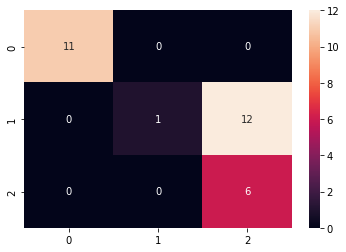

In [21]:
bdtc_text = BayesianDecisionTheoryClassifier(clf_nai_drop, utilityMat)
plot_accuracy(bdtc_text, x_train, x_test, y_train_names,y_test_names)
